# Гипергеометрическое распределение в Python
Библиотека `scipy`

In [1]:
from scipy.stats import hypergeom
import numpy as np

from math import comb # биномиальные коэффициенты

import matplotlib.pyplot as plt

Пусть $X\sim Hypergeom(N=10, D=5, n=4)$

Зададим распределение с заданными параметрами

In [2]:
N, D, n = 10, 5, 4
rv = hypergeom(N, D, n)

## Распределение вероятностей

Для вычисления вероятностей используем следующие методы

|Вероятность|Метод|
|-|-|
|$f(k)=P(X=k)$|`.pmf(k)`|
|$F(k)=P(X\leq k)$|`.cdf(k)`|
|$P(X>k)$|`.sf(k)=1-.cdf(k)`|
|$P(k_1<X\leq k_2)$|`.cdf(k2)-.cdf(k1)`|

Для для вычисления вероятности $P(k_1\leq X\leq k_2)$ можно использовать следующее наблюдение
$$
	P(k_1\leq X\leq k_2)=P(k_1-1< X\leq k_2)
$$


### Пример 1
Вычислим вероятность $P(X=2)=f(2)$



In [3]:
rv.pmf(k=2)

np.float64(0.4761904761904762)

Вычисли её непосредственно по формуле 

$$
	P(X=k)=f(k)=\frac{C_D^k C_{N-D}^{n-k}}{C_N^n}
$$

In [4]:
k = 2
comb(D, k)*comb(N-D, n-k)/comb(N, n)

0.47619047619047616

### Пример 2
Вычислим вероятности

$$
\begin{aligned}
	&P(X\leq 2) & &P(X>1) & &P(1<X\leq 3)
\end{aligned}
$$

In [5]:
rv.cdf(2), rv.sf(1), rv.cdf(2)-rv.cdf(1)

(np.float64(0.7380952380952381),
 np.float64(0.7380952380952381),
 np.float64(0.4761904761904762))

## Математическое ожидание, дисперсия, стандартное отклонение

Для вычисления используем следующие методы

|Величина|Метод|
|-|-|
|Математическое ожидание|`.mean()`|
|Дисперсия|`.var()`|
|Стандартное отклонение|`.std()`|

### Пример 3

Вычислим $E(X), Var(X), \sigma(X)$


In [6]:
rv.mean(), rv.var(), rv.std()

(np.float64(2.0),
 np.float64(0.6666666666666666),
 np.float64(0.816496580927726))

Можно вычислить непосредственно по формулам

$$
\begin{aligned}
	E(X)&=\frac{nD}{N} &
	Var(X)&=\frac{n(N-n)}{N-1}\left(\frac DN\right)\left(1-\frac DN\right) & \sigma(X)&=\sqrt{Var(X)}
\end{aligned}
$$

In [7]:
n*D/N, (n*(N-n)/(N-1))*(D/N)*(1-D/N), ((n*(N-n)/(N-1))*(D/N)*(1-D/N))**0.5

(2.0, 0.6666666666666666, 0.816496580927726)

## Визуализация распределения вероятностей

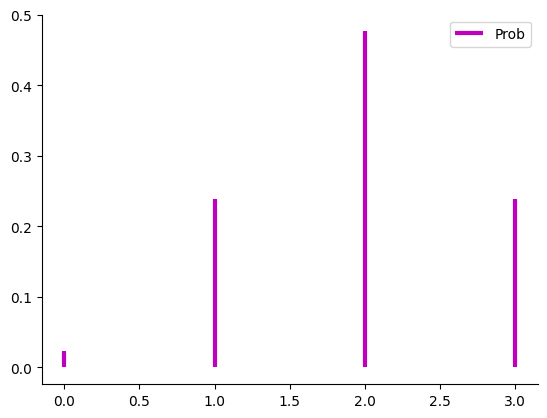

In [8]:
x = np.arange(start=max([0, D+n-N]), stop=min([D, n]), step=1)

fig, ax =  plt.subplots(1,1)

ax.vlines(x, 0, rv.pmf(x), linestyle='-', lw=3,  colors='m', label='Prob')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()